# Motivational Example


## Download Data

reference: [chollet](https://github.com/fchollet/deep-learning-with-python-notebooks)

In [1]:
import numpy as np
import keras
keras.__version__

Using TensorFlow backend.


'2.1.5'

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Comparing Different NN Architecture

In [3]:
x_train_input = x_train.reshape((60000, 28 * 28))
x_train_input = x_train_input.astype('float32') / 255
x_test_input = x_test.reshape((10000, 28 * 28))
x_test_input = x_test_input.astype('float32') / 255
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(units=512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(units=10, activation='softmax'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train_input, y_train,
                    epochs=10, batch_size=512,
                    validation_data=(x_test_input, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.3933 - acc: 0.8891 - val_loss: 0.2184 - val_acc: 0.9342
Epoch 2/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.1734 - acc: 0.9501 - val_loss: 0.1448 - val_acc: 0.9552
Epoch 3/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.1174 - acc: 0.9664 - val_loss: 0.1475 - val_acc: 0.9546
Epoch 4/10
60000/60000 [==============================] - 3s 46us/step 

In [5]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(28 * 28,)))
smaller_model.add(layers.Dense(10, activation='softmax'))
smaller_model.summary()

smaller_model.compile(optimizer='rmsprop',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
smaller_model_history = smaller_model.fit(x_train_input, y_train,
                                          epochs=10, batch_size=512,
                                          validation_data=(x_test_input, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 3140      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                50        
Total params: 3,190
Trainable params: 3,190
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 9us/step - loss: 1.8985 - acc: 0.3359 - val_loss: 1.6496 - val_acc: 0.4375
Epoch 2/10
60000/60000 [==============================] - 0s 8us/step - loss: 1.4741 - acc: 0.5252 - val_loss: 1.3065 - val_acc: 0.6022
Epoch 3/10
60000/60000 [==============================] - 0s 8us/step - loss: 1.1837 - acc: 0.6340 - val_loss: 1.0544 - val_acc: 0.6738
Epoch 4/10
60000/60000 [==============================] - 0s 8us/step - loss: 

In [6]:
epochs = range(1, 11)
original_model_val_loss = history.history['val_loss']
smaller_model_val_loss = smaller_model_history.history['val_loss']

From the picture below, we can see that the smaller model takes longer to learn and may not reach the same level of loss as the original model.

### Validation Loss - Original vs Larger Model

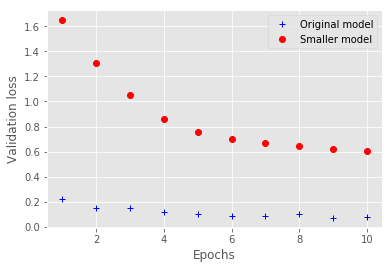

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

plt.plot(epochs, original_model_val_loss, 'b+', label='Original model')
plt.plot(epochs, smaller_model_val_loss, 'ro', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend();

In [8]:
larger_model = models.Sequential()
larger_model.add(layers.Dense(2048, activation='relu', input_shape=(28 * 28,)))
larger_model.add(layers.Dense(1024, activation='relu'))
larger_model.add(layers.Dense(10, activation='softmax'))
larger_model.summary()

larger_model.compile(optimizer='rmsprop',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
larger_model_history = larger_model.fit(x_train_input, y_train,
                                        epochs=10, batch_size=512,
                                        validation_data=(x_test_input, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 2048)              1607680   
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_7 (Dense)              (None, 10)                10250     
Total params: 3,716,106
Trainable params: 3,716,106
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 25s 421us/step - loss: 0.3747 - acc: 0.8910 - val_loss: 0.1256 - val_acc: 0.9590
Epoch 2/10
60000/60000 [==============================] - 26s 431us/step - loss: 0.1051 - acc: 0.9683 - val_loss: 0.1144 - val_acc: 0.9672
Epoch 3/10
60000/60000 [==============================] - 25s 420us/

Note the larger model has a larger validation loss, indicating overfitting. From epoch 4 onwards the larger was overfitting the training data

### Validation Loss - Original vs Larger Model

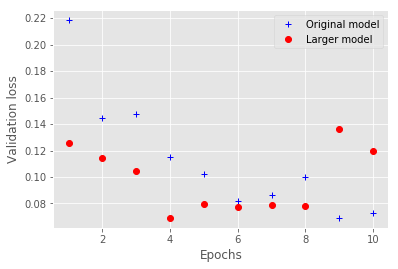

In [9]:
larger_model_history_val_loss = larger_model_history.history['val_loss']

plt.plot(epochs, original_model_val_loss, 'b+', label='Original model')
plt.plot(epochs, larger_model_history_val_loss, 'ro', label='Larger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend();

### Training Loss

The picture below shows that larger model learn faster because of its larger capacity. The loss value for the larger model drop towards zero faster

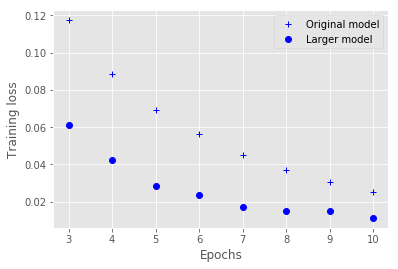

In [10]:
original_train_loss = history.history['loss']
larger_model_history_loss = larger_model_history.history['loss']

plt.plot(epochs[2:], original_train_loss[2:], 'b+', label='Original model')
plt.plot(epochs[2:], larger_model_history_loss[2:], 'bo', label='Larger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

## Regularisation

In [11]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(units=2048, kernel_regularizer=regularizers.l2(0.001), 
                          activation='relu', input_shape=(28 * 28,)))
#l1_model.add(layers.Dense(units=2048, kernel_regularizer=regularizers.l1(0.001), 
#                          activation='relu', input_shape=(28 * 28,)))
#l1_l2_model.add(layers.Dense(units=2048, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), 
#                          activation='relu', input_shape=(28 * 28,)))
l2_model.add(layers.Dense(units=1024, kernel_regularizer=regularizers.l2(0.001), 
                          activation='relu'))
l2_model.add(layers.Dense(units=10, activation='softmax'))
l2_model.summary()

l2_model.compile(optimizer='rmsprop',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
l2_model_history = l2_model.fit(x_train_input, y_train,
                                epochs=10, batch_size=512,
                                validation_data=(x_test_input, y_test))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 2048)              1607680   
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_10 (Dense)             (None, 10)                10250     
Total params: 3,716,106
Trainable params: 3,716,106
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 30s 504us/step - loss: 1.3412 - acc: 0.8758 - val_loss: 0.6118 - val_acc: 0.9198
Epoch 2/10
60000/60000 [==============================] - 29s 490us/step - loss: 0.4387 - acc: 0.9426 - val_loss: 0.4271 - val_acc: 0.9207
Epoch 3/10
60000/60000 [==============================] - 29s 490us/

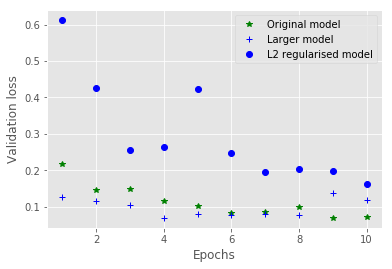

In [12]:
l2_model_history_val_loss = l2_model_history.history['val_loss']

plt.plot(epochs, original_model_val_loss, 'g*', label='Original model')
plt.plot(epochs, larger_model_history_val_loss, 'b+', label='Larger model')
plt.plot(epochs, l2_model_history_val_loss, 'bo', label='L2 regularised model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend();

***

In [13]:
from keras import regularizers

l1_l2_model = models.Sequential()
l1_l2_model.add(layers.Dense(units=2048, kernel_regularizer=regularizers.l2(0.001), 
                          activation='relu', input_shape=(28 * 28,)))
l1_l2_model.add(layers.Dense(units=1024, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), 
                         activation='relu'))
l1_l2_model.add(layers.Dense(units=10, activation='softmax'))
l1_l2_model.summary()

l1_l2_model.compile(optimizer='rmsprop',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
l1_l2_model_history = l1_l2_model.fit(x_train_input, y_train,
                                epochs=10, batch_size=512,
                                validation_data=(x_test_input, y_test))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 2048)              1607680   
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_13 (Dense)             (None, 10)                10250     
Total params: 3,716,106
Trainable params: 3,716,106
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 32s 532us/step - loss: 7.2087 - acc: 0.7959 - val_loss: 2.0204 - val_acc: 0.8463
Epoch 2/10
60000/60000 [==============================] - 32s 527us/step - loss: 1.7835 - acc: 0.8903 - val_loss: 1.6323 - val_acc: 0.9178
Epoch 3/10
60000/60000 [==============================] - 32s 530us/

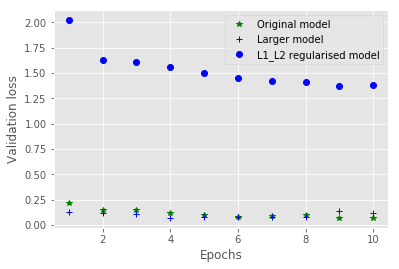

In [14]:
l1_l2_model_history_val_loss = l1_l2_model_history.history['val_loss']

plt.plot(epochs, original_model_val_loss, 'g*', label='Original model')
plt.plot(epochs, larger_model_history_val_loss, 'b+', label='Larger model')
plt.plot(epochs, l1_l2_model_history_val_loss, 'bo', label='L1_L2 regularised model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend();

## Dropouts

In [15]:
from keras import regularizers

do_model = models.Sequential()
do_model.add(layers.Dense(units=2048, activation='relu', input_shape=(28 * 28,)))
do_model.add(layers.Dropout(0.5))
do_model.add(layers.Dense(units=1024, activation='relu'))
do_model.add(layers.Dropout(0.5))
do_model.add(layers.Dense(units=10, activation='softmax'))
do_model.summary()

do_model.compile(optimizer='rmsprop',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
do_model_history = do_model.fit(x_train_input, y_train,
                                epochs=10, batch_size=512,
                                validation_data=(x_test_input, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 2048)              1607680   
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                10250     
Total params: 3,716,106
Trainable params: 3,716,106
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 27s 457us/step - loss: 0

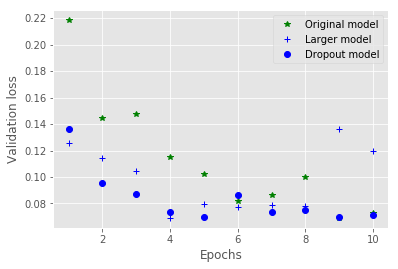

In [16]:
do_model_history_val_loss = do_model_history.history['val_loss']

plt.plot(epochs, original_model_val_loss, 'g*', label='Original model')
plt.plot(epochs, larger_model_history_val_loss, 'b+', label='Larger model')
plt.plot(epochs, do_model_history_val_loss, 'bo', label='Dropout model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend();

***

In [17]:
print(original_model_val_loss)

[0.21837620306015015, 0.14481844553947448, 0.14748659710884093, 0.11492474496364594, 0.102519975233078, 0.08172686407566071, 0.086543260407447808, 0.099910108637809747, 0.069104908573627472, 0.072891588735580451]


In [18]:
print(do_model_history_val_loss)

[0.13641935634613037, 0.095416248822212224, 0.087362579774856564, 0.073384588146209712, 0.069698130989074708, 0.086345831394195563, 0.073700748085975654, 0.074982979154586793, 0.069960251474380494, 0.071643053901195519]


In [23]:
np.vstack([original_model_val_loss, do_model_history_val_loss]).T

array([[ 0.2183762 ,  0.13641936],
       [ 0.14481845,  0.09541625],
       [ 0.1474866 ,  0.08736258],
       [ 0.11492474,  0.07338459],
       [ 0.10251998,  0.06969813],
       [ 0.08172686,  0.08634583],
       [ 0.08654326,  0.07370075],
       [ 0.09991011,  0.07498298],
       [ 0.06910491,  0.06996025],
       [ 0.07289159,  0.07164305]])